In [1]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import math

def visualize_scores_legacy(log_path, print_means=False, src='synthia', target='cityscapes'):
    scores = {f'{target}':{}, f'{src}': {}, f'{target}-ema': {}, f'{src}-ema': {}}
    with open(log_path, 'r') as f:
        data = f.readlines()

        # detect #number of epochs
        last_line = data[-1].split(" ")
        epochs = int(last_line[1])
        
        for line in data:
            tokens = line.split(" ")
            dataset, epoch  = tokens[0], int(tokens[1])

            # fix the wrong data format
            scores_ = tokens[2:-1]
            scores_epoch = []
            for score_ in scores_:
                if "dtype" in score_:
                    continue

                if "tensor" in score_:
                    scores_epoch.append(float(score_[7:-1]))
            
            # scores_epoch = [float(score) for score in tokens[2:-1]]
            scores[dataset][epoch] = scores_epoch

    epochs = np.arange(1, epochs + 1)
    scores_synthia_val, scores_cityscapes_val = [], []
    scores_synthia_ema_val, scores_cityscapes_ema_val = [], []

    for key in  scores[f'{target}']:
        scores_cityscapes_val.append(np.mean(scores[f'{target}'][key]))
        if print_means:
            print(f"{target}-val-mean-IoU: {np.mean(scores[f'{target}'][key])}")

    for key in  scores[f'{src}']:
        scores_synthia_val.append(np.mean(scores[f'{src}'][key]))

    # also add scores when weight averaging is used
    for key in  scores[f'{target}-ema']:
        scores_cityscapes_ema_val.append(np.mean(scores[f'{target}-ema'][key]))
        if print_means:
            print(f"{target}-val-EMA-mean-IoU: {np.mean(scores[f'{target}-ema'][key])}")

    for key in  scores[f'{src}-ema']:
        scores_synthia_ema_val.append(np.mean(scores[f'{src}-ema'][key]))

    fig, axis = plt.subplots(ncols=2, figsize=(12, 8))

    axis[0].plot(epochs, scores_synthia_val, c='c') 
    axis[0].plot(epochs, scores_synthia_ema_val, c='r')
    leg = axis[0].legend(loc="lower right")

    axis[1].plot(epochs, scores_cityscapes_val, label=f"{target}", c='c')
    axis[1].plot(epochs, scores_cityscapes_ema_val, label=f"{target}-EMA", c='r')
    leg = axis[1].legend(loc="lower right")
    
    for ax in axis.flat:
        ax.set(xlabel='Epochs', ylabel='mean-IoU')
    
    
    plt.show()

    return scores_cityscapes_val, scores_cityscapes_ema_val


def visualize_scores(log_path, print_means=False, src='synthia', target='cityscapes'):
    scores = {f'{target}':{}, f'{src}': {}, f'{target}-ema': {}, f'{src}-ema': {}}
    with open(log_path, 'r') as f:
        data = f.readlines()

        # detect #number of epochs
        last_line = data[-1].split(" ")
        epochs = int(last_line[1])
        
        for line in data:
            tokens = line.split(" ")
            dataset, epoch  = tokens[0], int(tokens[1])

            # fix the wrong data format
            scores_ = tokens[2:-1]
            scores_epoch = []
            for score_ in scores_:
                    scores_epoch.append(float(score_[0:-1]))
            
            # scores_epoch = [float(score) for score in tokens[2:-1]]
            scores[dataset][epoch] = scores_epoch

    epochs = np.arange(1, epochs + 1)
    scores_synthia_val, scores_cityscapes_val = [], []
    scores_synthia_ema_val, scores_cityscapes_ema_val = [], []

    for key in  scores[f'{target}']:
        scores_cityscapes_val.append(np.mean(scores[f'{target}'][key]))
        if print_means:
            print(f"{target}-val-mean-IoU: {np.mean(scores[f'{target}'][key])}")

    for key in  scores[f'{src}']:
        scores_synthia_val.append(np.mean(scores[f'{src}'][key]))

    # also add scores when weight averaging is used
    for key in  scores[f'{target}-ema']:
        scores_cityscapes_ema_val.append(np.mean(scores[f'{target}-ema'][key]))
        if print_means:
            print(f"{target}-val-EMA-mean-IoU: {np.mean(scores[f'{target}-ema'][key])}")

    for key in  scores[f'{src}-ema']:
        scores_synthia_ema_val.append(np.mean(scores[f'{src}-ema'][key]))

    fig, axis = plt.subplots(ncols=2, figsize=(12, 8))
    axis[0].plot(epochs, scores_synthia_val, label=f'{src}', c='c') 
    axis[0].plot(epochs, scores_synthia_ema_val, label=f'{src}-EMA', c='r')

    axis[1].plot(epochs, scores_cityscapes_val, label=f"{target}", c='c')
    axis[1].plot(epochs, scores_cityscapes_ema_val, label=f"{target}-EMA", c='r')
    leg = axis[1].legend(loc="lower right")
    
    for ax in axis.flat:
        ax.set(xlabel='Epochs', ylabel='mean-IoU')

    plt.show()

    return scores_cityscapes_val, scores_cityscapes_ema_val

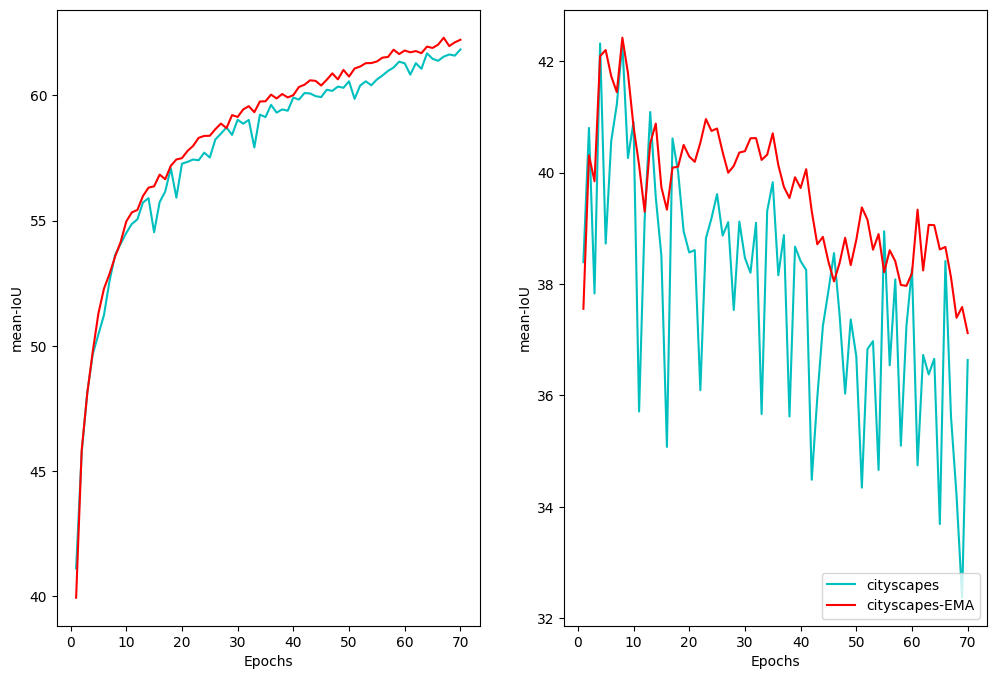

37.86146371428572 4.252824181134777
39.62260057142857 1.4580215536111005


In [270]:
target, target_ema = visualize_scores('logs_new/segformer_b5_AdamW_lr_5e05_decay_099_randomCrop_randomBrightnessContrast.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

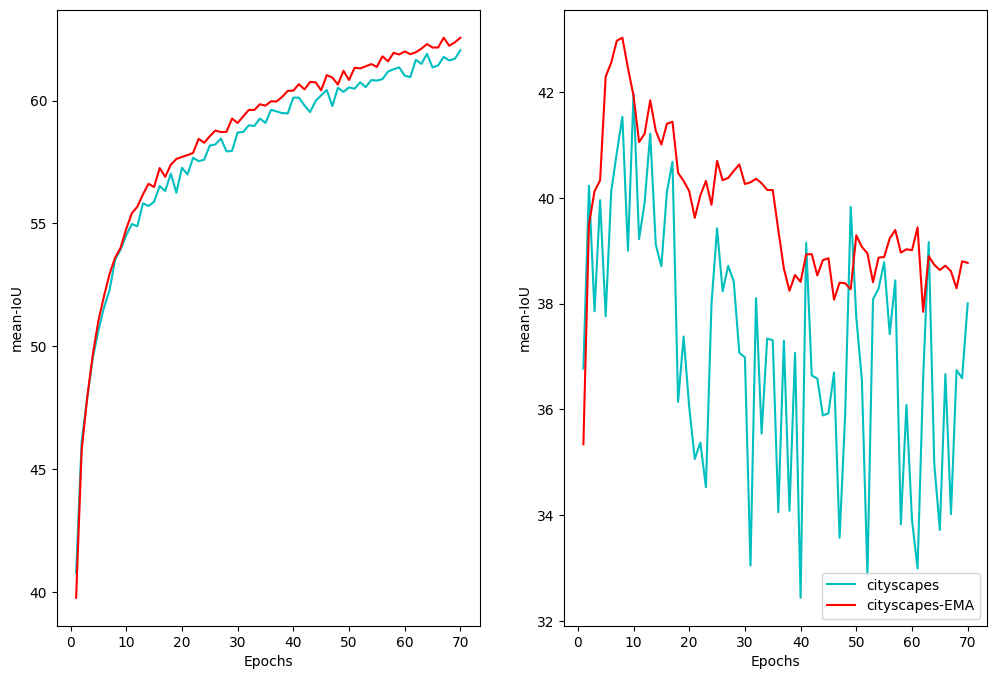

37.20499628571429 5.132949199100496
39.728623142857145 1.8716589919158355


In [224]:
target, target_ema = visualize_scores('logs_new/segformer_b5_AdamW_lr_5e05_decay_0999_randomCrop_randomBrightnessContrast.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


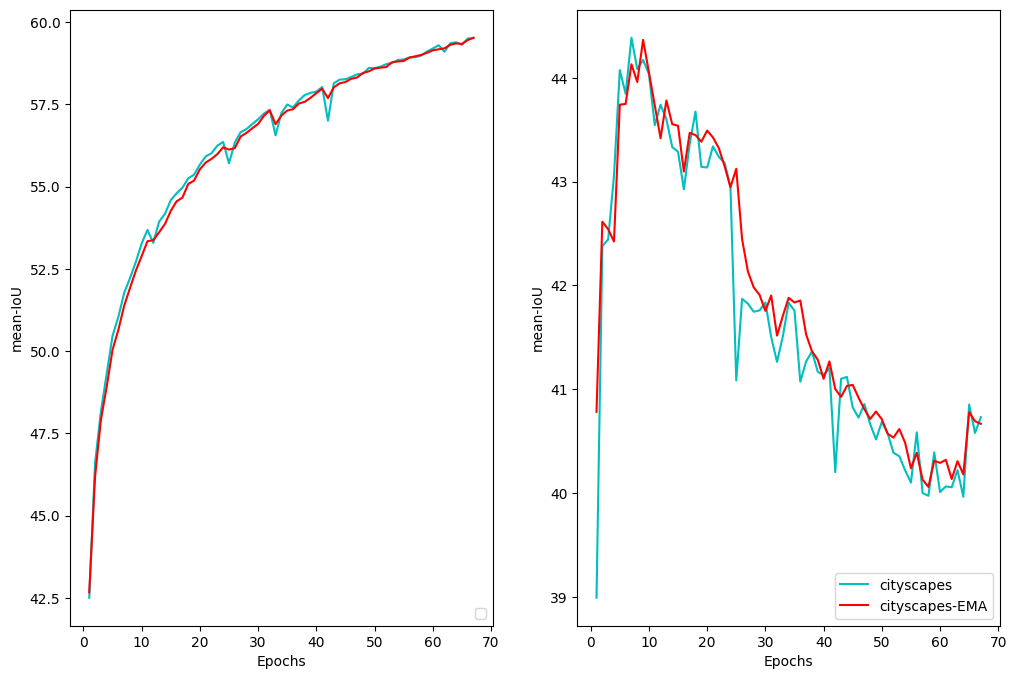

41.71447753731344 1.9144217263129502
41.87062552835821 1.7091970890048376


In [271]:
target, target_ema = visualize_scores_legacy('logs_new/segformer_b5_SGD_lr_5e03_baseline.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


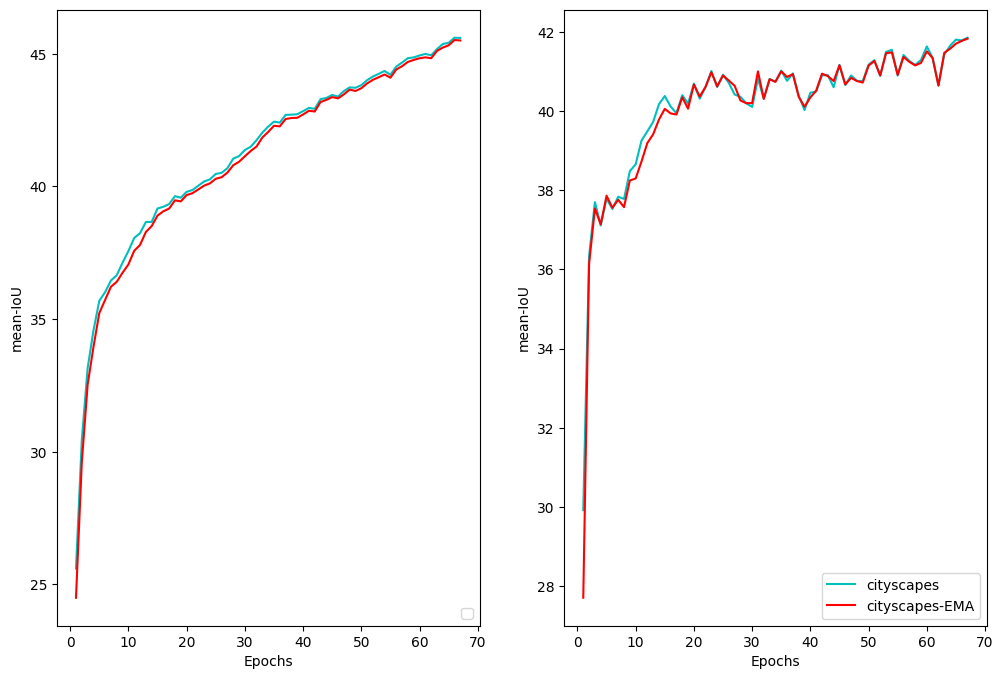

40.19182380000001 3.0243029095100105
40.108470316417915 3.8663160001452948


In [228]:
target, target_ema = visualize_scores_legacy('logs_new/segformer_b5_SGD_lr_1e04_baseline.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

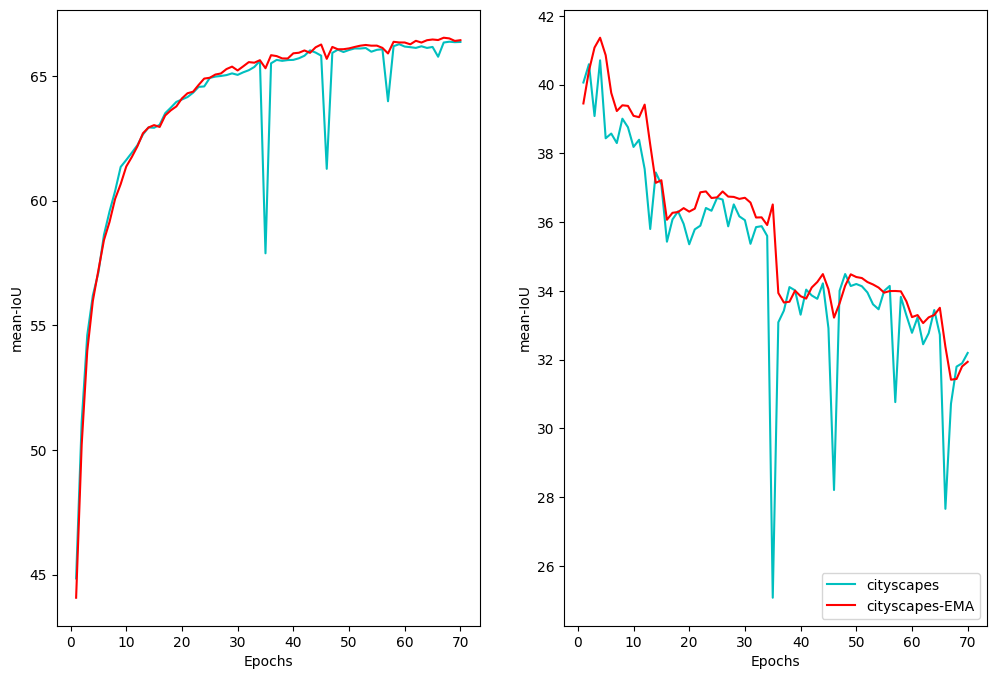

34.88463914285715 7.953990611387839
35.655282 6.069355362904569


In [229]:
target, target_ema = visualize_scores('logs_new/segformer_b5_AdamW_lr_5e05_baseline.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

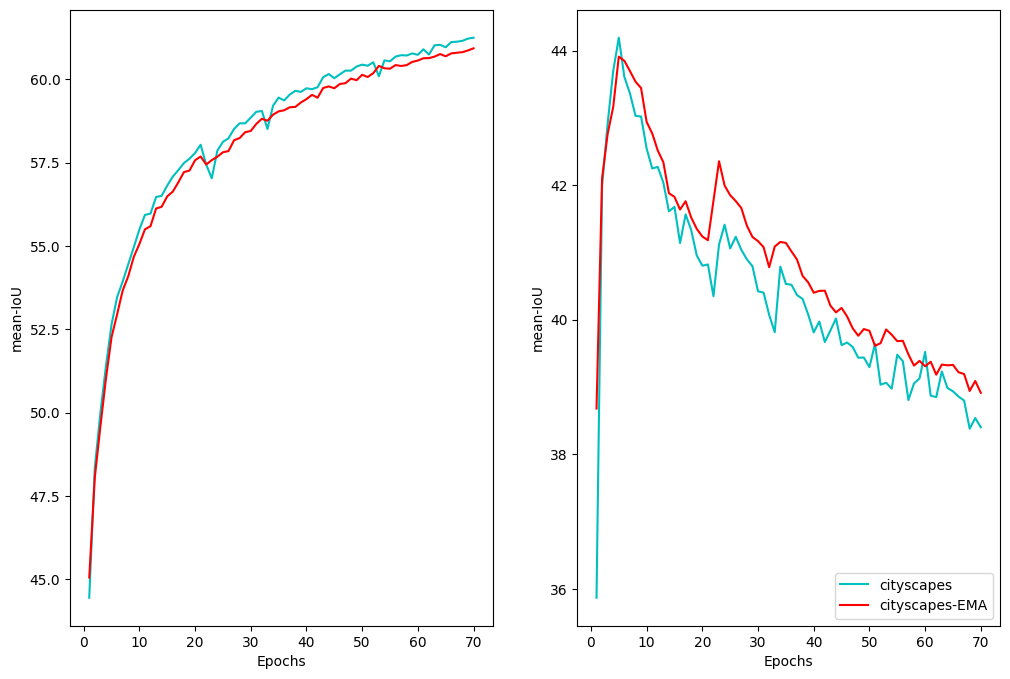

40.402763428571426 2.294339242262531
40.86360485714285 1.889505434507836


In [272]:
target, target_ema = visualize_scores('logs_new/segformer_b5_SGD_lr_1e02_decay_0999_baseline.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

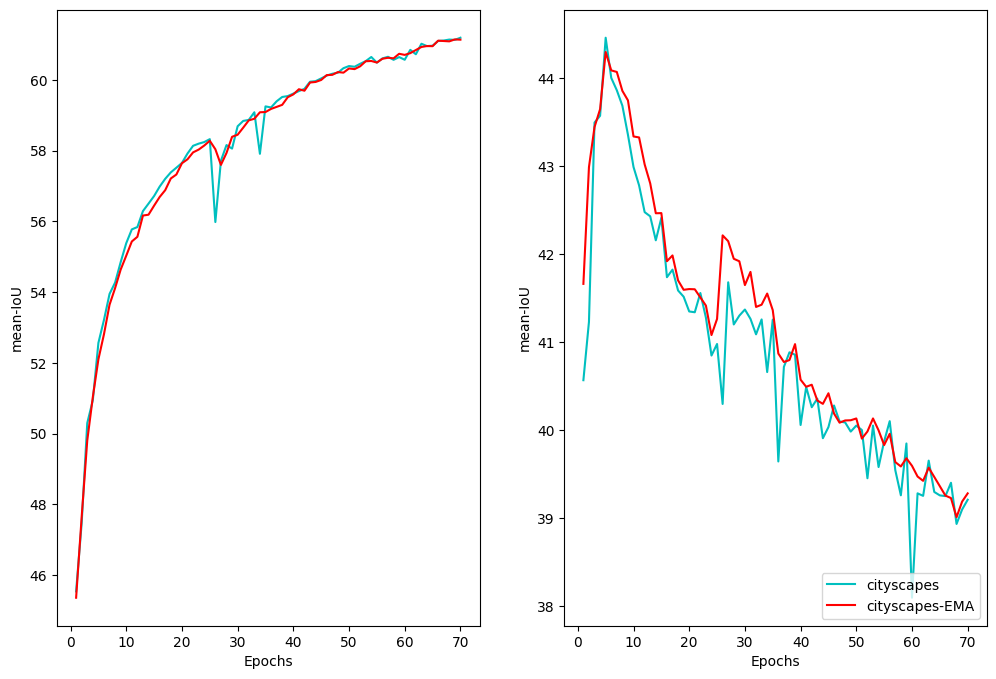

40.87088485714286 1.9522514586564086
41.14982628571428 2.0321915358462044


In [231]:
target, target_ema = visualize_scores('logs_new/segformer_b5_SGD_lr_1e02_decay_099_baseline.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

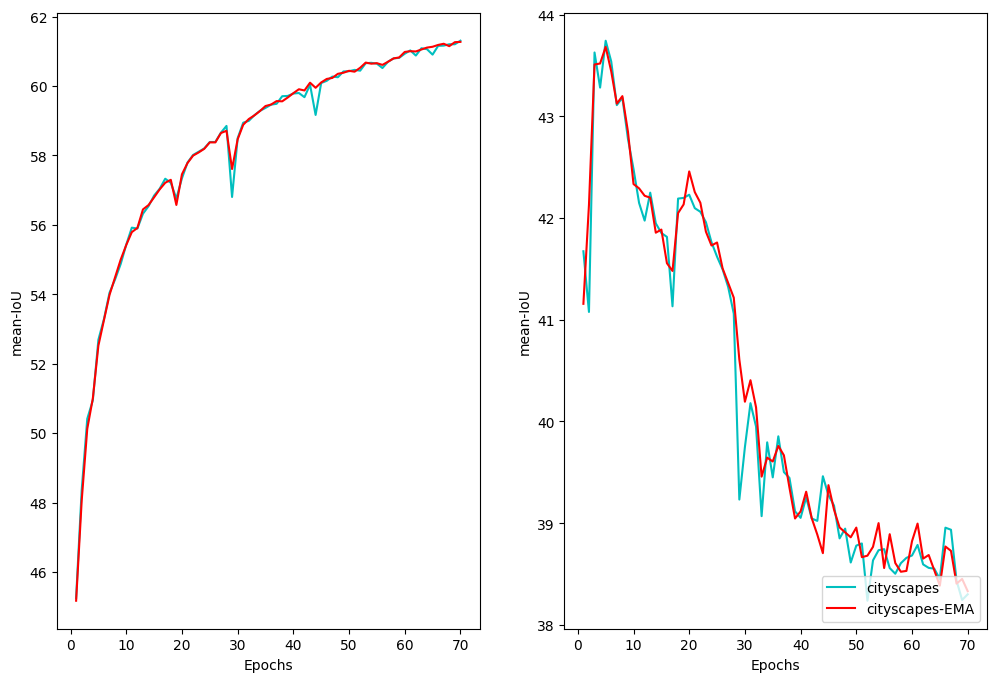

40.262855714285706 2.8648314468559213
40.329195142857145 2.8424334571478362


In [232]:
target, target_ema = visualize_scores('logs_new/segformer_b5_SGD_lr_1e02_decay095_baseline.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

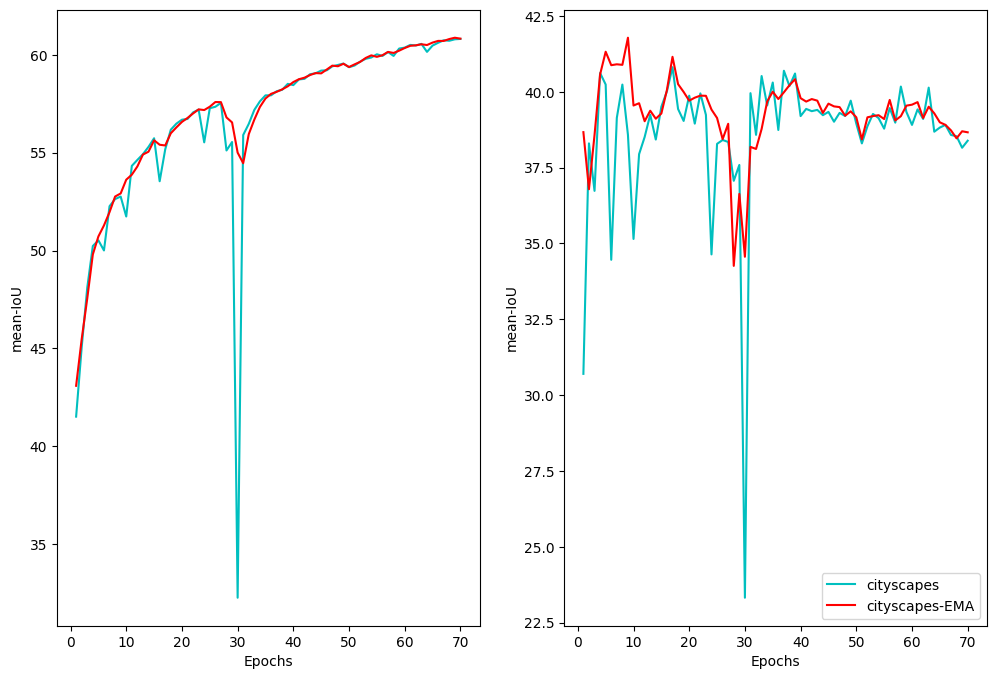

38.629688 5.792509464404571
39.29382142857143 1.4300841999008171


In [233]:
target, target_ema = visualize_scores('logs_new/segformer_b5_SGD_lr_1e02_decay_099_randomCrop_baseline.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

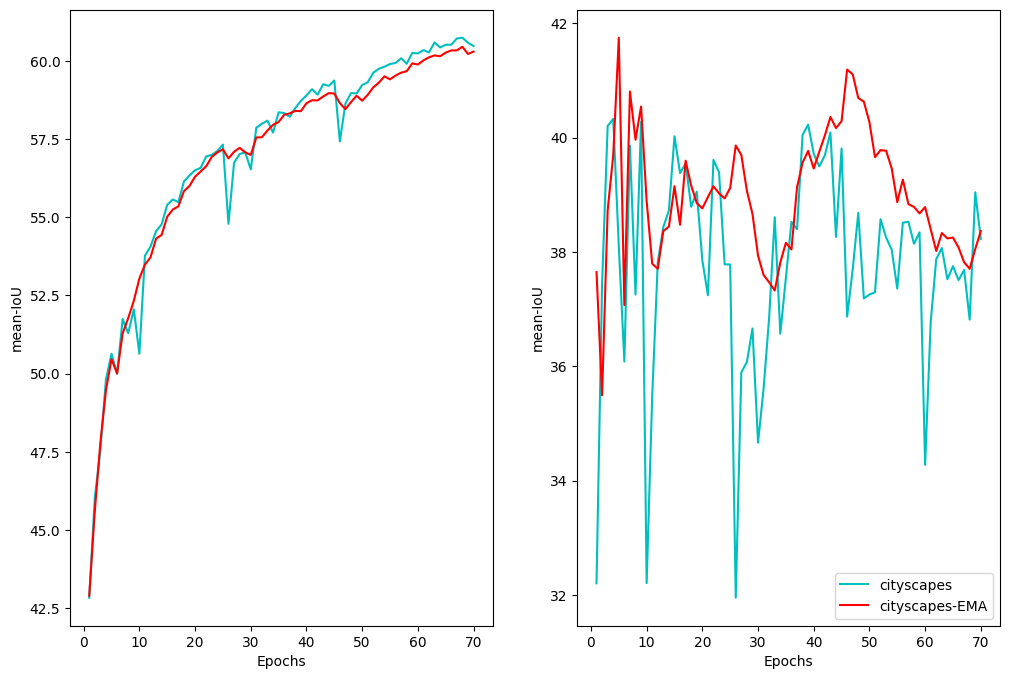

37.82707714285714 3.249518584883264
38.99064828571428 1.202651136725634


In [234]:
target, target_ema = visualize_scores('logs_new/segformer_b5_SGD_lr_1e02_decay_0999_randomCrop_baseline.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

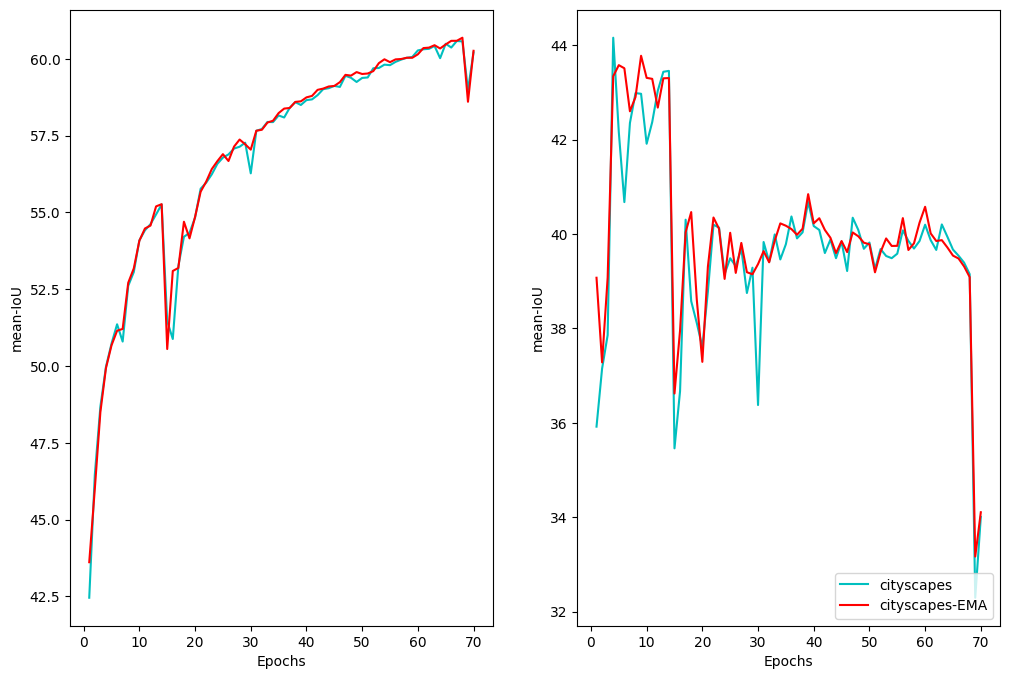

39.670396857142855 3.8891622655501195
40.000085714285724 3.450946777361631


In [235]:
target, target_ema = visualize_scores('logs_new/segformer_b5_SGD_lr_1e02_decay095_randomCrop_baseline.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

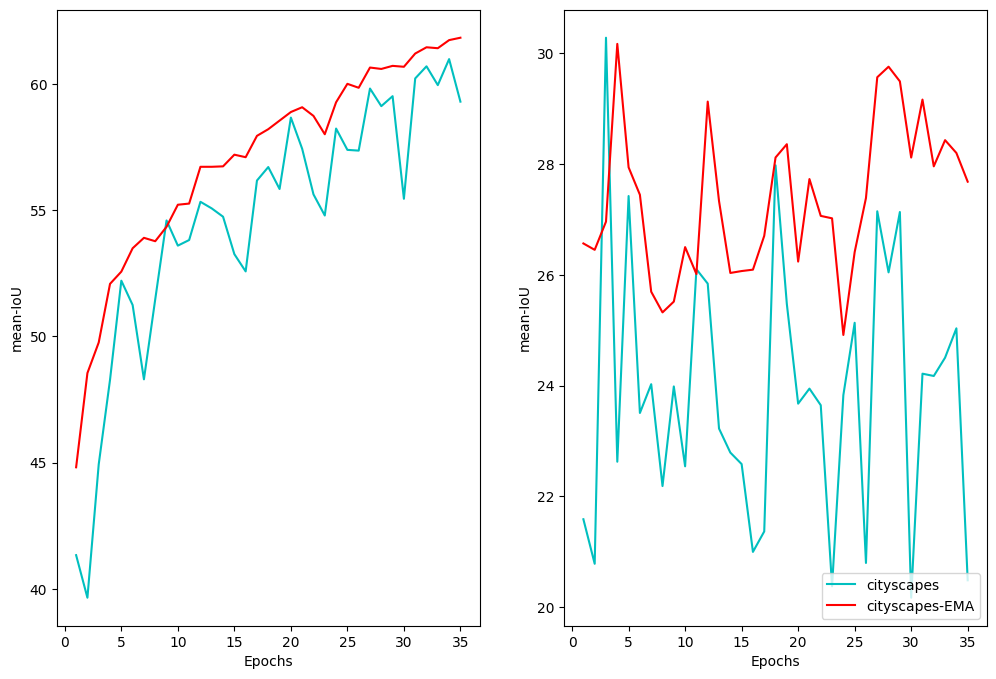

23.87415371428572 5.638795515903348
27.357785142857143 1.79056451710498


In [273]:
target, target_ema = visualize_scores('logs_new/segformer_b5_AdamW_lr_5e04_decay_099_randomCrop_baseline.txt', print_means=False, src='synthia', target='cityscapes')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

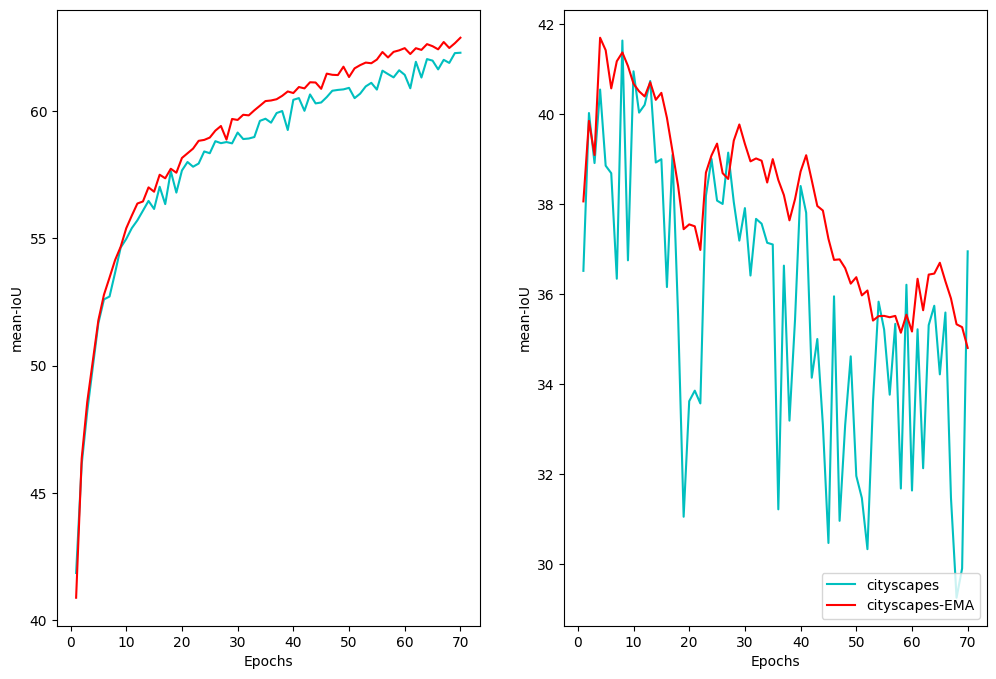

35.791772571428574 9.306367447019104
38.01457142857142 3.5804379488179605


In [237]:
target, target_ema = visualize_scores('logs_new/segformer_b5_AdamW_lr_6e05_decay_099_randomCrop_randomBrightnessContrast.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

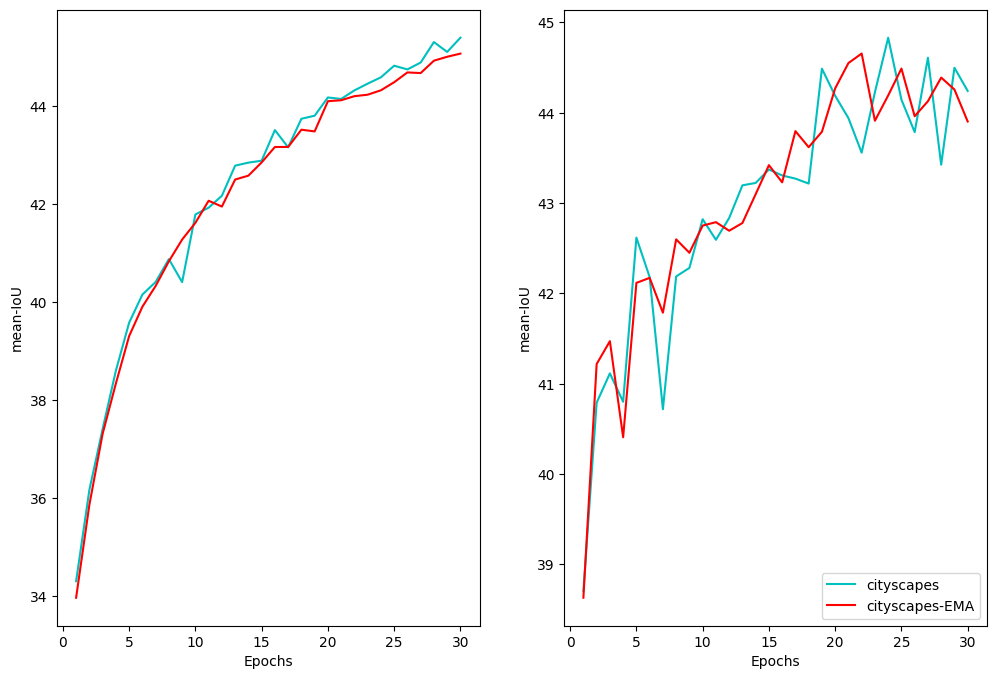

42.972572 1.925382637242668
43.05111666666666 1.8183157719755592


In [238]:
target, target_ema = visualize_scores('./logs_new/synthia_to_cityscapes_segformer_b5_SGD_lr_1e03_decay_0995_randomCrop_randomBrightnessContrast.txt', print_means=False)

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

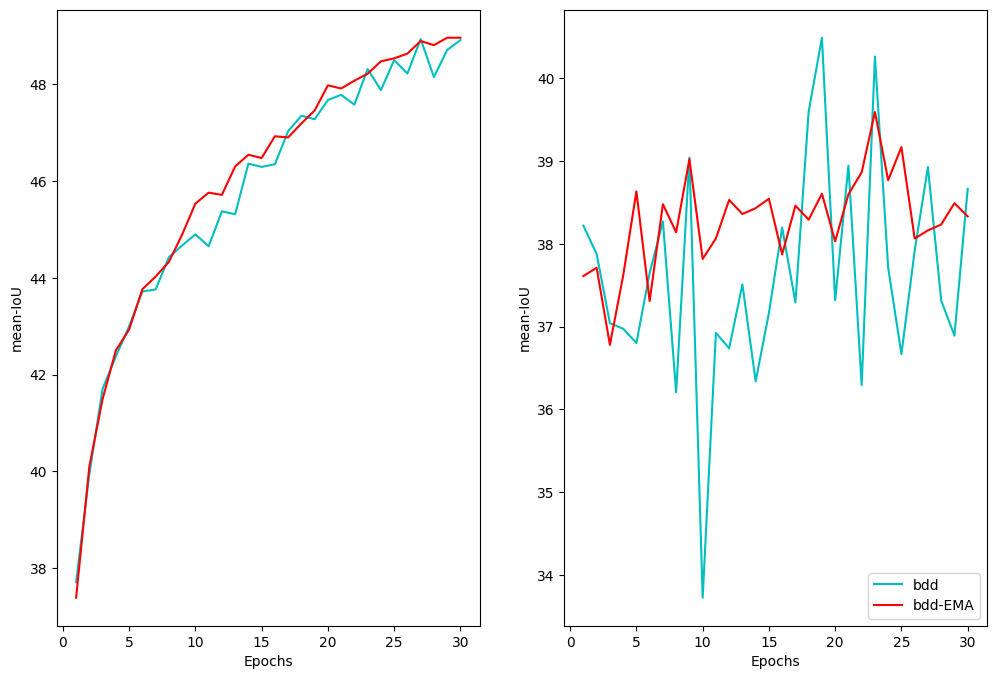

37.63191066666668 1.739649233399554
38.28563833333333 0.30785103057388785


In [243]:
target, target_ema = visualize_scores('./logs_new/synthia_to_bdd_segformer_b5_SGD_lr_5e04_decay_0995_randomCrop_randomBrightnessContrast_.txt', print_means=False, src='synthia', target='bdd')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

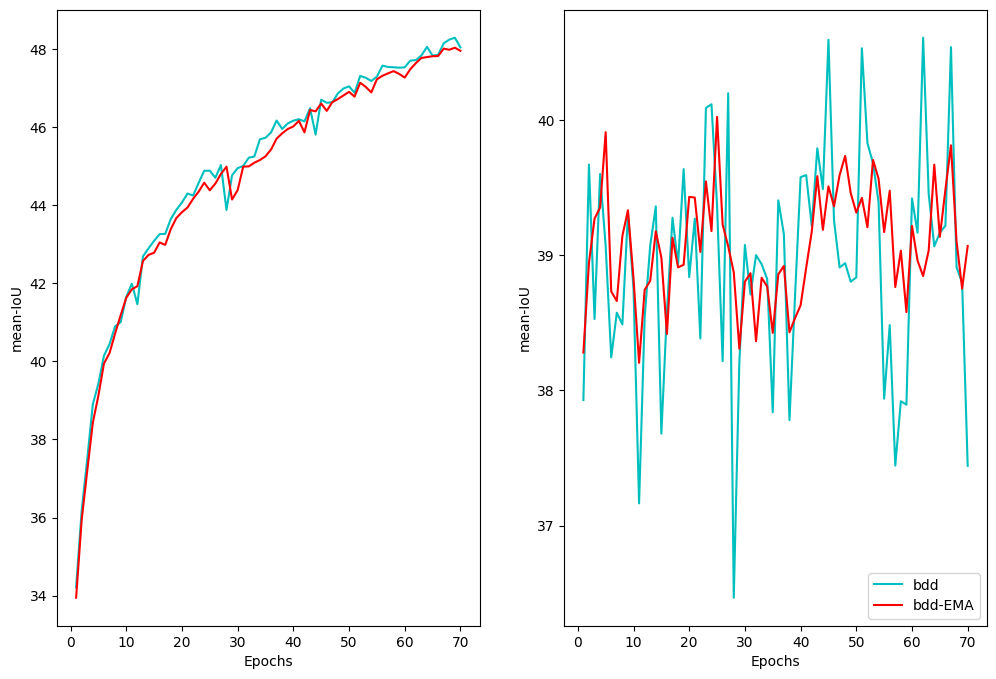

38.95677671428571 0.6694459555620617
39.074544714285715 0.1656328284992041


In [244]:
target, target_ema = visualize_scores('./logs_new/synthia_to_bdd_segformer_b5_SGD_lr_1e03_decay_0999_randomCrop_randomBrightnessContrast_.txt', print_means=False, src='synthia', target='bdd')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

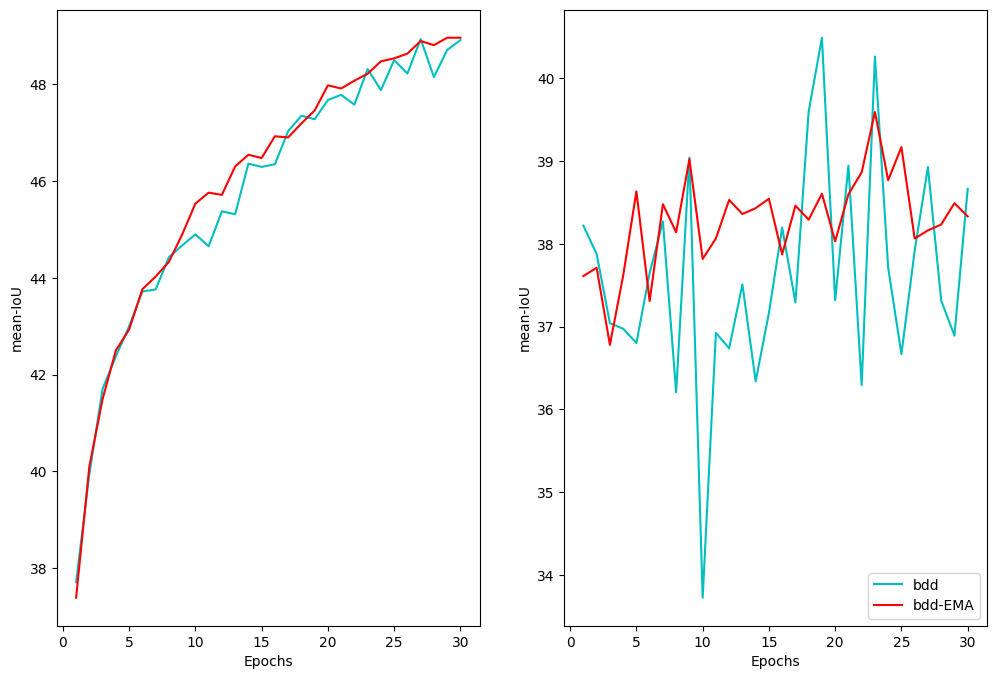

37.63191066666668 1.739649233399554
38.28563833333333 0.30785103057388785


In [241]:
target, target_ema = visualize_scores('./logs_new/synthia_to_bdd_segformer_b5_SGD_lr_5e04_decay_0995_randomCrop_randomBrightnessContrast_.txt', print_means=False, src='synthia', target='bdd')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

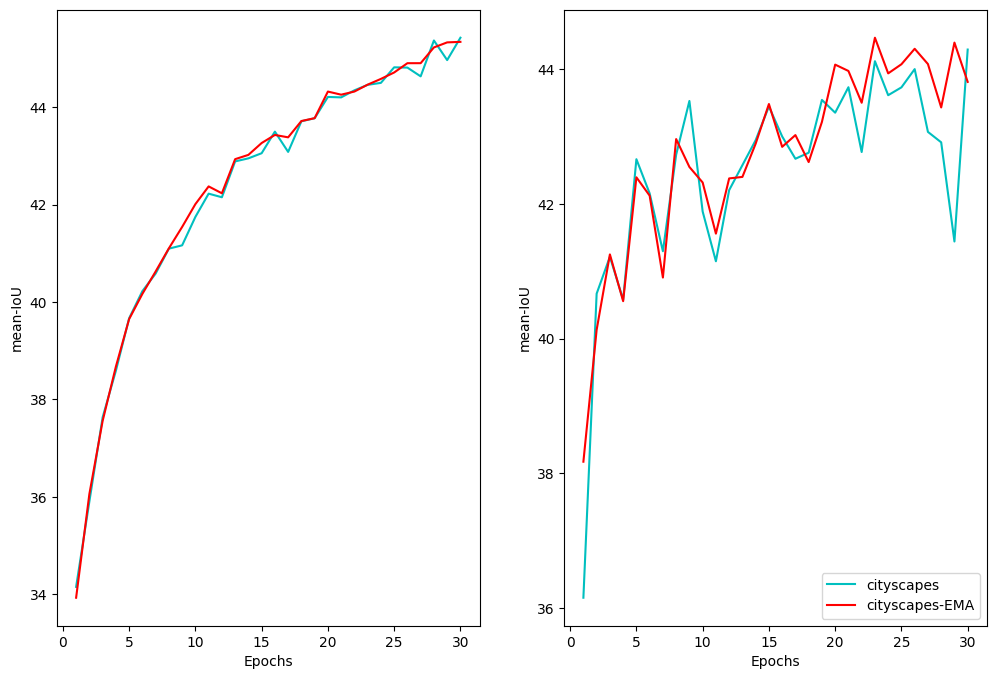

42.47472933333333 2.3776240829795583
42.72862266666666 2.001346772179557


In [245]:
target, target_ema = visualize_scores('./logs_new/synthia_to_cityscapes_segformer_b5_SGD_lr_1e03_decay_09_randomCrop_randomBrightnessContrast.txt', print_means=False, src='synthia', target='cityscapes')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

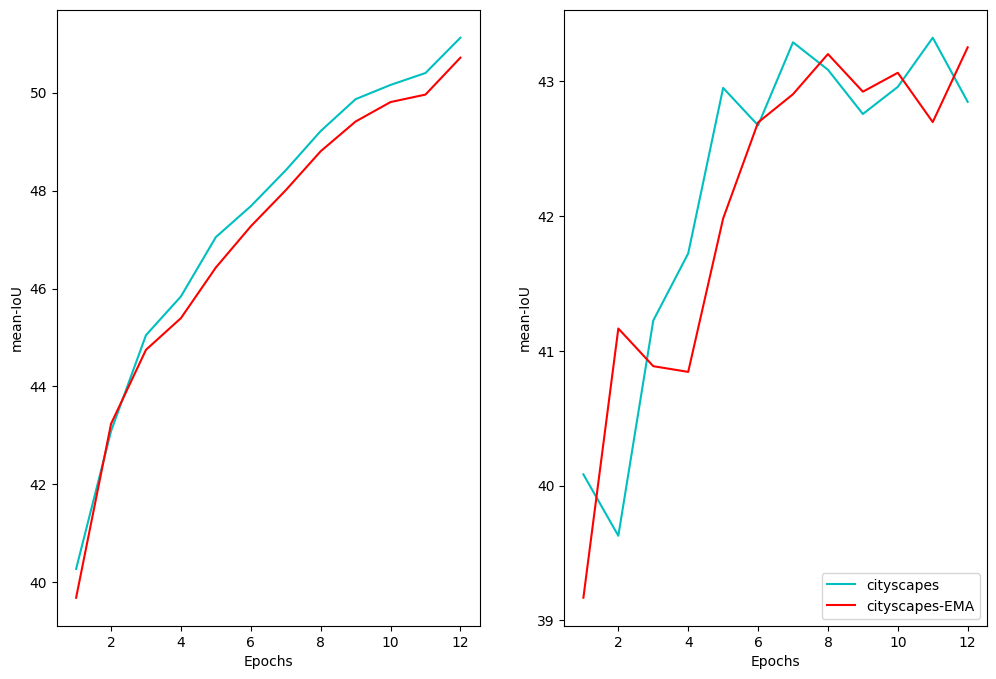

42.21234666666666 1.467539611088891
42.065445000000004 1.5029189239416691


In [251]:
target, target_ema = visualize_scores('./logs_new/synthia_to_cityscapes_segformer_b5_SGD_lr_5e03_decay_0995.txt', print_means=False, src='synthia', target='cityscapes')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

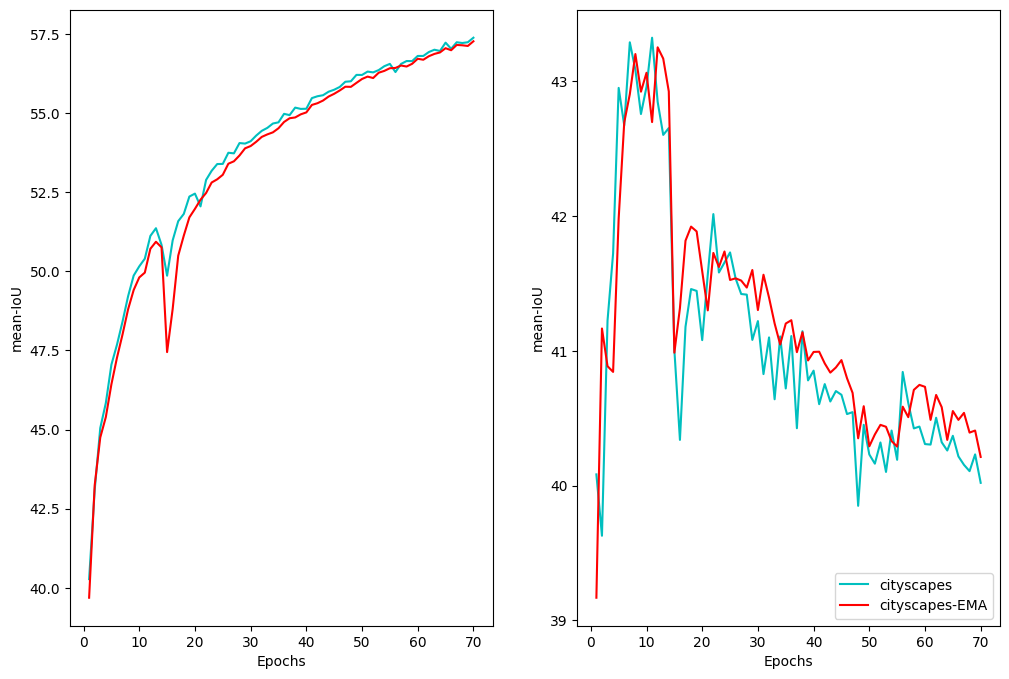

41.05007342857142 0.8369805532539593
41.20766542857143 0.719595790833388


In [258]:
target, target_ema = visualize_scores('./logs_new/synthia_to_cityscapes_segformer_b5_SGD_lr_5e03_decay_0995.txt', print_means=False, src='synthia', target='cityscapes')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

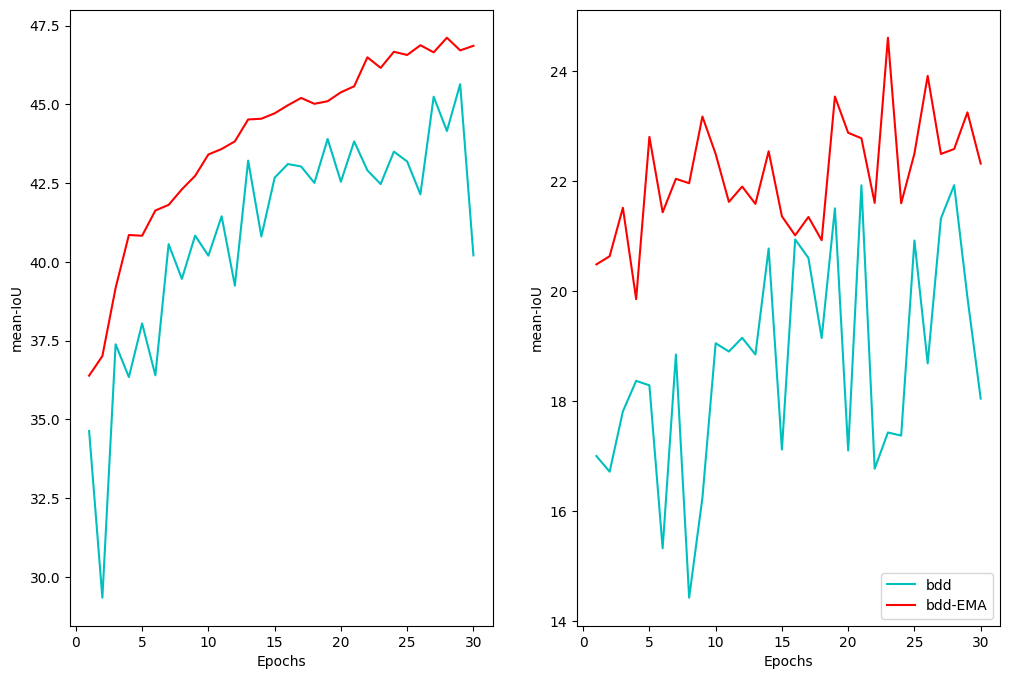

18.678656666666665 3.7233921302088877
22.090504 1.0657566243173333


In [259]:
target, target_ema = visualize_scores('./logs_new/synthia_to_bdd_segformer_b5_AdamW_lr_1e03_decay_0999_randomCrop_randomBrightnessContrast_.txt', print_means=False, src='synthia', target='bdd')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

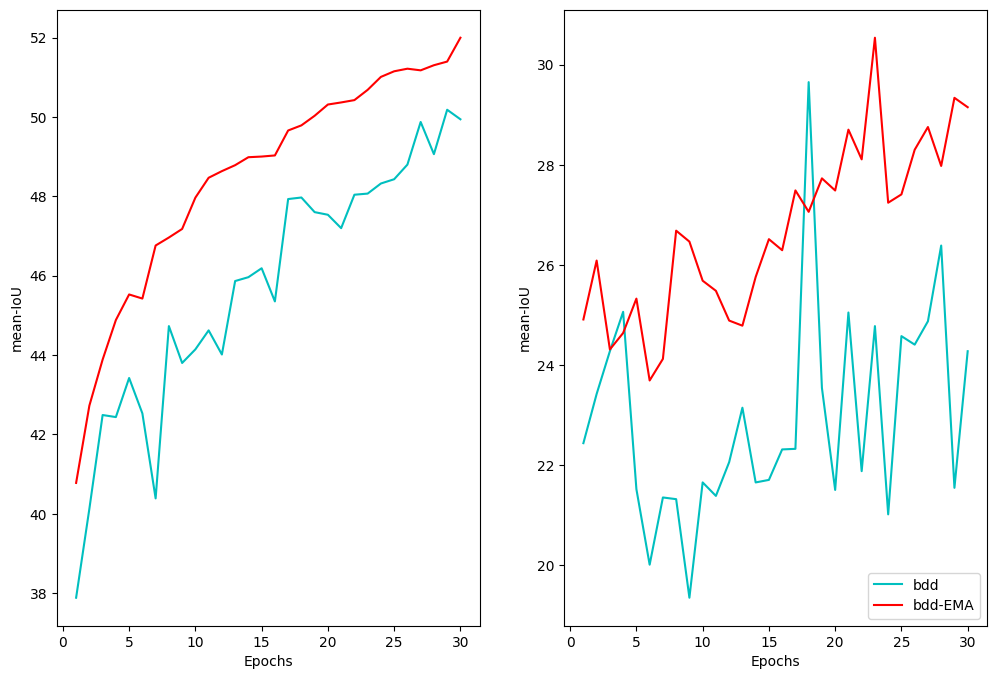

22.94906133333333 4.285338597978221
26.69747066666667 2.902287111626221


In [260]:
target, target_ema = visualize_scores('./logs_new/synthia_to_bdd_segformer_b5_AdamW_lr_5e04_decay_0995_randomCrop_randomBrightnessContrast_.txt', print_means=False, src='synthia', target='bdd')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))

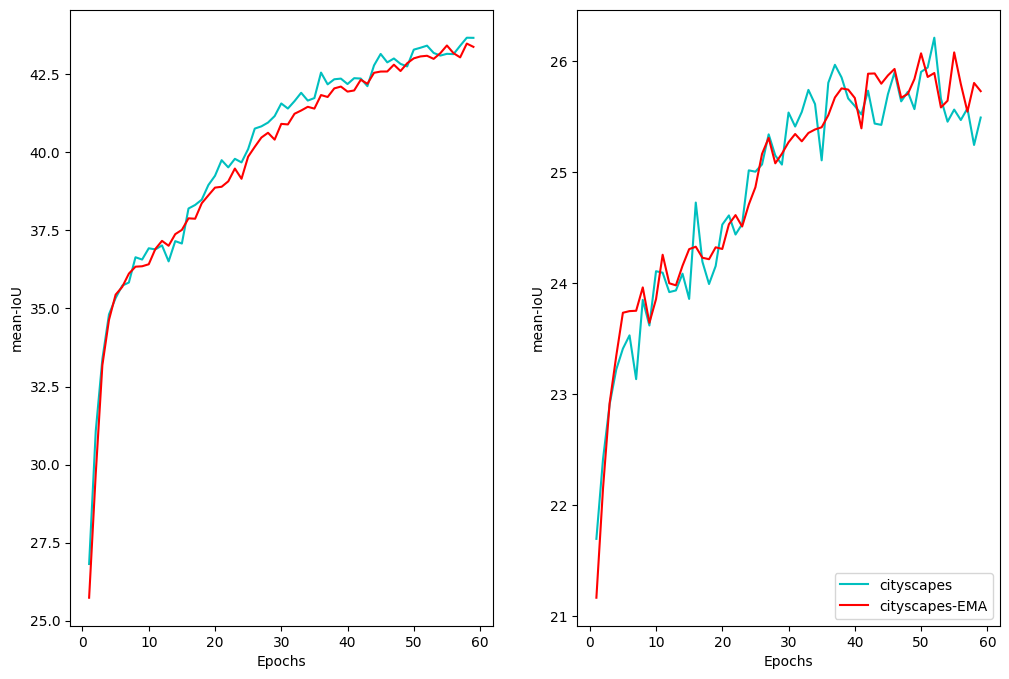

24.85885864406779 0.9895757210286702
24.89409491525424 1.0289542721300773


In [2]:
target, target_ema = visualize_scores('./logs_final/gta5_to_cityscapes_segformer_b5_SGD_lr_1e02_decay_0995_randomBrightness_RCrop.txt', print_means=False, src='gta5', target='cityscapes')

print(np.mean(target), np.var(target))
print(np.mean(target_ema), np.var(target_ema))